# Final production run for SGDClassifier model

Making use of experiments from other notebooks

- Standard scaling on data
- Hyperparameters: loss='squared_hinge', penalty='l1', random_state=1
- No resampling

# Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import SGDClassifier # SGD model

# Reading into data frame from file

In [2]:
data_frame = pd.read_csv("../../data/dupes_dropped_creditcard.csv")

# Data to fit and targets

In [3]:
base_feature_set = ["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"]
feature_set = ["V10", "V11", "V12", "V14", "V16", "V17"]

target_set = ["Class"]

X = data_frame[feature_set]
y = data_frame[target_set]

# Splits data into 80-20 train-test

Prevents data leakage (where training and test sets influence each other in scaling)

stratify = y tells the function to split proportionally with respect to "Class". This is so the test set doesn't have a different class weight than the train set. I believe this controls for the cases where less of the POSITIVE FRAUD cases show up in the training or test set, reducing overfitting(?).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Scale Features

In [5]:
standard_scaler = StandardScaler()

X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_test_standard_scaled = standard_scaler.transform(X_test)

# Initialize Model

In [6]:
clf = SGDClassifier(loss='squared_hinge', penalty='l1', random_state=1)

In [7]:
clf.fit(X_train_standard_scaled, y_train.values.ravel())
y_pred = clf.predict(X_test_standard_scaled)

# Metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.58      0.70        95

    accuracy                           1.00     56746
   macro avg       0.94      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746



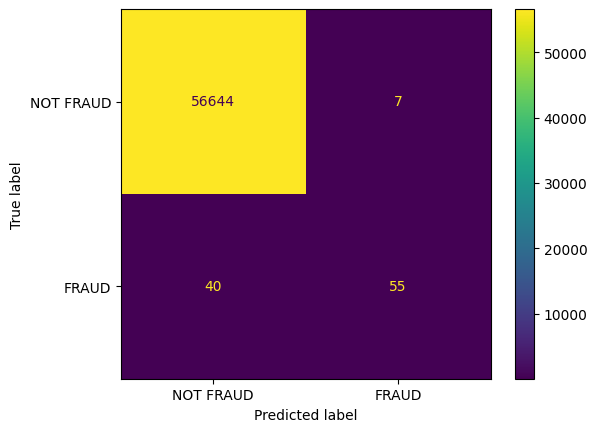

In [8]:
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(cm, display_labels=["NOT FRAUD", "FRAUD"]).plot()

In [9]:
kf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(clf, X_train_standard_scaled, y_train.values.ravel(), cv=kf, scoring="f1")
print("Cross validation scores:", cv_scores)
print(f"Mean Validation Score: {np.mean(cv_scores)}")

Cross validation scores: [0.63492063 0.69230769 0.6870229  0.703125   0.72058824]
Mean Validation Score: 0.6875928926571607


<Figure size 800x600 with 0 Axes>

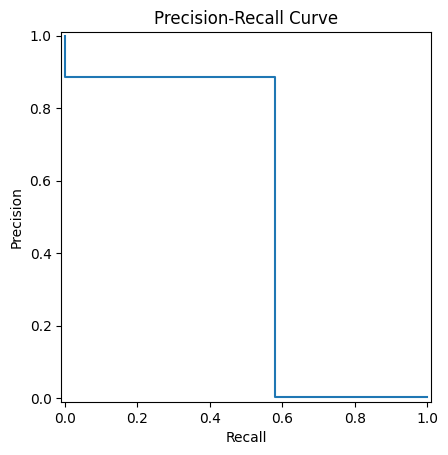

In [10]:
import matplotlib.pyplot as plt

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()

plt.title("Precision-Recall Curve")
plt.show()

In [11]:
from pickle import dump

with open ("SGD_Classifier_model.pkl", "wb") as file:
    dump(clf, file)